In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn import svm
import sklearn.linear_model as LM
import scipy.stats as st
from scipy.optimize import root,fsolve
from sklearn.feature_selection import  VarianceThreshold,SelectKBest,f_classif,chi2
from sklearn.feature_selection import RFE,RFECV,SelectFromModel
from sklearn.linear_model import Lasso,LassoCV,lasso_path,Ridge,RidgeCV
from sklearn.linear_model import enet_path,ElasticNetCV,ElasticNet

变量重要性排名 [  1   1  35 140 123]


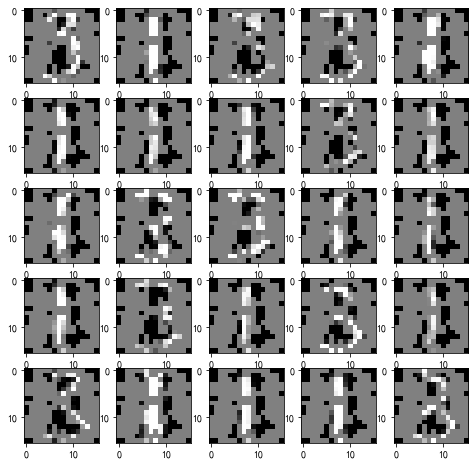

变量重要性排名 [177 176 110  69   7]


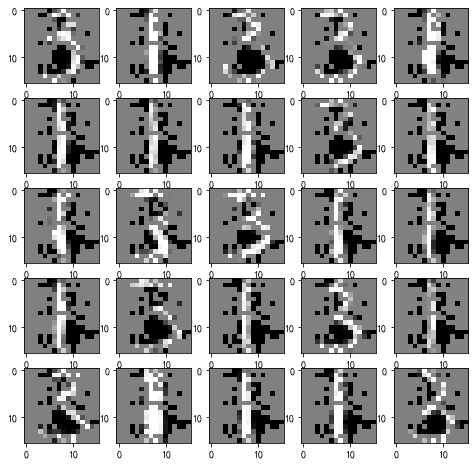

In [2]:
data=pd.read_table('邮政编码数据.txt',sep=' ',header=None)
tmp=data.loc[(data[0]==1) | (data[0]==3)]
X=tmp.iloc[:,1:-1]
Y=tmp.iloc[:,0]
np.random.seed(1)
ids=np.random.choice(len(Y),25)
estimators=[LM.LogisticRegression(),svm.SVC(kernel='linear',random_state=1)]
for estimator in estimators:
    selector=RFE(estimator=estimator,n_features_to_select=80)
    selector.fit(X,Y)
    #print("N_features %s"%selector.n_features_)
    print("变量重要性排名 %s"%selector.ranking_[0:5])
    Xtmp=selector.inverse_transform(selector.transform(X))
    plt.figure(figsize=(8,8))
    for i,item in enumerate(ids):
        img=np.array(Xtmp[item,]).reshape((16,16))
        plt.subplot(5,5,i+1)
        plt.imshow(img,cmap=cm.gray)
    plt.show()
    

代码说明：
（1）第1至4行：读入手写体邮政编码数字数据。选择数字1和3的点阵数据，后续将采用包裹式策略中的RFE算法找到对识别数字1和3有重要作用的变量。确定输入变量和输出变量。
（2）第7行：指定RFE算法中的预测模型，分别为Logistic回归和广义线性可分下的支持向量分类机。后续将依据预测模型给出的变量系数判断变量重要性。
（3）第8至18行：分别借助Logistic回归和广义线性可分下的支持向量分类机，进行特征选择，以及结果可视化。
